In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('housing.csv', header=None)
cols = list(data.columns)
# add column with ones, as the first column
data[-1] = 1.0
data = data[[-1] + cols]
# put examples in columns
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
-1,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
0,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
1,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [3]:
print('We have {} features, and {} samples'.format(*data.shape))

We have 15 features, and 506 samples


In [4]:
shuffled_index = np.random.permutation(data.columns)
train_index = shuffled_index[:400]
test_index = shuffled_index[400:]

In [5]:
x_train = data[train_index].values[:-1, :]
y_train = data[train_index].values[-1, :]

x_test = data[test_index].values[:-1, :]
y_test = data[test_index].values[-1, :]

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14, 400) (400,) (14, 106) (106,)


In [7]:
def linear_regression(theta, data, target):
    '''linear_regression.m file receives the training data X,
    the training target values (house prices) y, and the current parameters θ.'''
    h_prime = np.squeeze(np.dot(theta.transpose(), data))
    return ((h_prime - target)**2).sum() / 2

In [8]:
theta = np.ones((14, 1))
linear_regression(theta, x_train, y_train)

165796533.34648216

In [9]:
np.squeeze(np.dot(theta.transpose(), x_train)).shape

(400,)

In [10]:
from scipy import optimize

In [61]:
def run_optimization(linear_regression, x_train, y_train):
    starting_guess = (2 * np.random.rand(14, 1) -1 )/100
    results  =  optimize.minimize(linear_regression,
                                  starting_guess,
                                  method = 'Powell', #'Nelder-Mead',
                                  # tol = 0.00000005,
                                  args=(x_train, y_train),
                                  options = {'maxiter': 10000, 'disp': True}
                                 )
    return (results.success, results.x)

In [62]:
params={}

for i in range(100):
    res = run_optimization(linear_regression, x_train, y_train)
    if res[0]:
        params[i] = res[1]
params = pd.DataFrame(params)
params.head()

Optimization terminated successfully.
         Current function value: 3743.247367
         Iterations: 24
         Function evaluations: 3182
Optimization terminated successfully.
         Current function value: 3740.665036
         Iterations: 28
         Function evaluations: 3742
Optimization terminated successfully.
         Current function value: 3746.917490
         Iterations: 20
         Function evaluations: 2647
Optimization terminated successfully.
         Current function value: 3739.273790
         Iterations: 27
         Function evaluations: 3601
Optimization terminated successfully.
         Current function value: 3769.213754
         Iterations: 24
         Function evaluations: 3208
Optimization terminated successfully.
         Current function value: 3743.159244
         Iterations: 24
         Function evaluations: 3180
Optimization terminated successfully.
         Current function value: 3744.508226
         Iterations: 20
         Function evaluations: 2668

Optimization terminated successfully.
         Current function value: 3740.382791
         Iterations: 23
         Function evaluations: 3029
Optimization terminated successfully.
         Current function value: 3737.983939
         Iterations: 28
         Function evaluations: 3698
Optimization terminated successfully.
         Current function value: 3764.026082
         Iterations: 27
         Function evaluations: 3617
Optimization terminated successfully.
         Current function value: 3745.278636
         Iterations: 33
         Function evaluations: 4383
Optimization terminated successfully.
         Current function value: 3760.554975
         Iterations: 26
         Function evaluations: 3458
Optimization terminated successfully.
         Current function value: 3747.315463
         Iterations: 20
         Function evaluations: 2673
Optimization terminated successfully.
         Current function value: 3743.914222
         Iterations: 28
         Function evaluations: 3738

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,29.620126,36.219800,28.781555,35.383941,26.746551,29.739933,29.206761,49.375089,37.399947,30.804943,...,31.209078,35.414494,33.061768,29.261243,32.806484,36.358430,36.945388,38.829739,27.745854,25.136460
1,-0.087472,-0.088887,-0.087504,-0.088845,-0.082535,-0.087602,-0.087726,-0.091722,-0.088335,-0.087534,...,-0.089247,-0.089637,-0.088601,-0.087597,-0.086383,-0.091969,-0.084176,-0.089674,-0.086382,-0.086337
2,0.041100,0.041067,0.042197,0.040981,0.038570,0.041350,0.041428,0.045003,0.038651,0.040444,...,0.044776,0.041145,0.040535,0.041942,0.039860,0.041749,0.042497,0.041735,0.040267,0.040368
3,0.009950,0.008776,0.013429,0.008213,0.011496,0.010291,0.011466,0.012615,-0.000629,0.008417,...,0.015542,0.008013,0.007866,0.011561,0.008157,0.007664,0.019954,0.008910,0.008781,0.008221
4,2.940174,2.926061,2.929484,2.938551,2.756440,2.940760,2.918332,2.866092,2.829647,2.897155,...,2.992564,2.927668,2.911298,2.943023,2.951221,2.931086,2.876820,2.932224,2.880564,2.853429


In [63]:
summary = {'max': params.max(axis=1),
           'mean': params.mean(axis=1),
           'min': params.min(axis=1)}
pd.DataFrame(summary)
           

,max,mean,min
0,49.375089,33.706914,24.930290
1,-0.082535,-0.088250,-0.096031
2,0.049944,0.041161,0.037203
3,0.019954,0.009305,-0.000629
4,3.011486,2.909840,2.756440
5,-10.087260,-15.305958,-19.103490
6,4.457003,3.852781,2.428086
7,0.020576,-0.000562,-0.010123
8,-0.896801,-1.281763,-1.502018
9,0.373092,0.280058,0.235808


In [67]:
results = run_optimization(linear_regression, x_train, y_train)
results[0]

Optimization terminated successfully.
         Current function value: 3748.299681
         Iterations: 28
         Function evaluations: 3717


True

In [68]:
true_theta = results[1]

In [69]:
def func_eval(theta, x):
    return np.squeeze(np.dot(theta.transpose(), x))

In [70]:
y_train_eval = func_eval(true_theta, x_train)
y_test_eval = func_eval(true_theta, x_test)

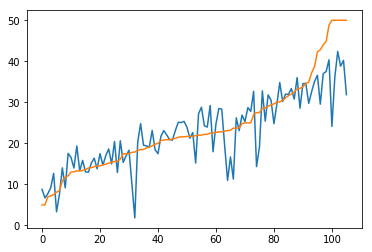

In [71]:
plt.plot(y_test_eval[y_test.argsort()])
plt.plot(np.sort(y_test))


In [72]:
def rms(a,b):
    #train_rms=sqrt(mean((predicted_prices - actual_prices).^2));
    return np.sqrt(np.mean((a-b)**2))

In [73]:
# Test error
rms(y_test, y_test_eval)

5.8802553921228222

In [74]:
# Train error
rms(y_train, y_train_eval)

4.3291452279088798

In [75]:
print(true_theta)

[  3.88718239e+01  -8.95493470e-02   4.14069908e-02   8.39779183e-03
   2.93618482e+00  -1.70379323e+01   3.49144363e+00   9.19538140e-04
  -1.35097795e+00   2.94014486e-01  -1.28308479e-02  -1.00931736e+00
   9.02230093e-03  -5.19776113e-01]
